In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [3]:
sns.set(style="white", palette="muted", color_codes=True)

In [6]:
lidar_static = np.load("../../data/lidar_labelled_data/lidar_array_static.npy")
lidar_agent_static = np.load("../../data/lidar_labelled_data/lidar_array_agent_static.npy")
lidar_dynamic = np.load("../../data/lidar_labelled_data/lidar_array_agent_dynamic.npy")

In [8]:
def preprocess_data(X, num_measurements=10, num_samples=100, max_value=1900):
    X = X.astype(np.float32)
    X[X > max_value] = 2000.
    X = np.reshape(X, (num_measurements, num_samples))
    return X

In [9]:
def plot_lidar(X, title="", step=1):
    N, M = X.shape
    sub_idxs = np.arange(start=0., stop=M, step=1)
    sub_idxs = sub_idxs.astype(np.int32)
    plt.figure(figsize=(25, 10))
    for i in range(0, X.shape[0]):
        plt.plot(X[i, sub_idxs], label='measurement {}'.format(i))
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

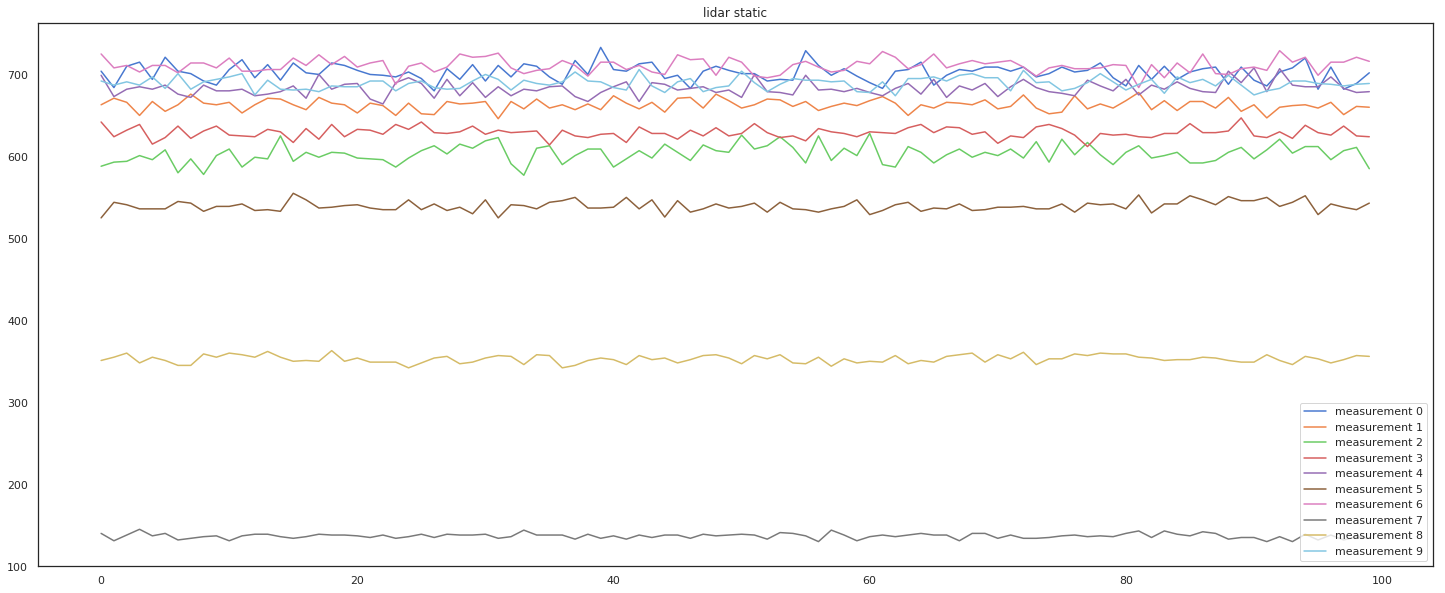

In [10]:
X_static = preprocess_data(lidar_static)
plot_lidar(X_static, title='lidar static')

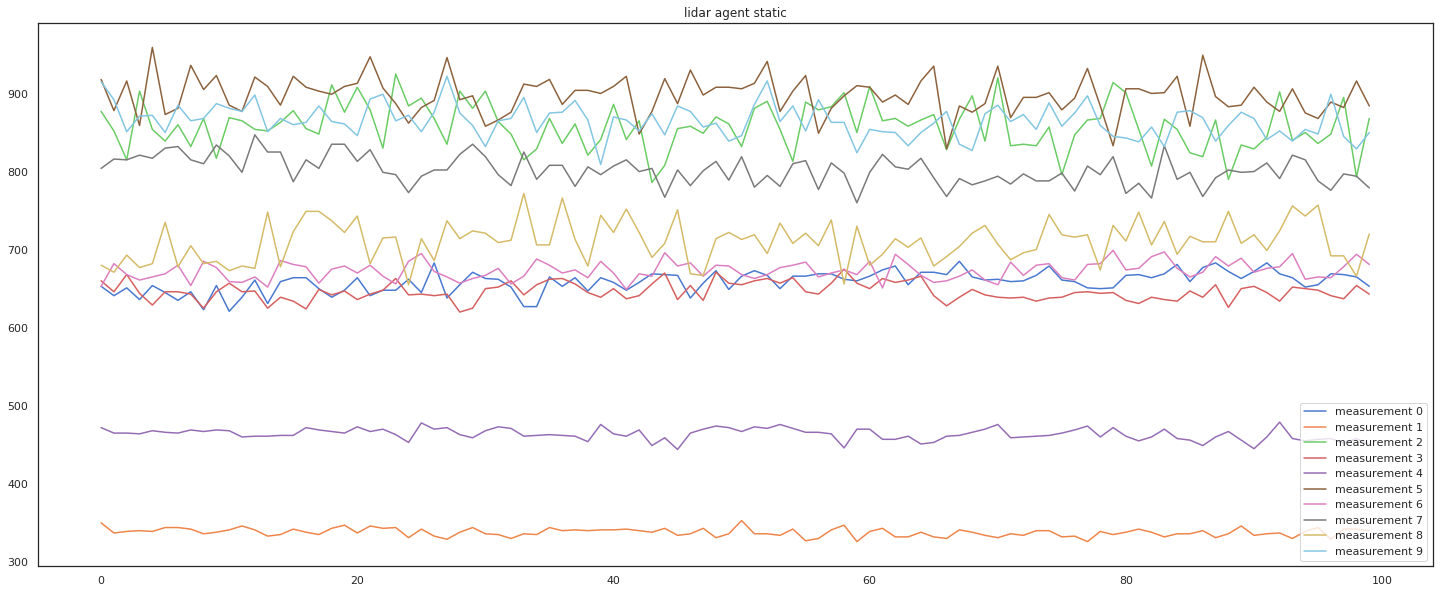

In [11]:
X_agent_static = preprocess_data(lidar_agent_static)
plot_lidar(X_agent_static, title='lidar agent static')

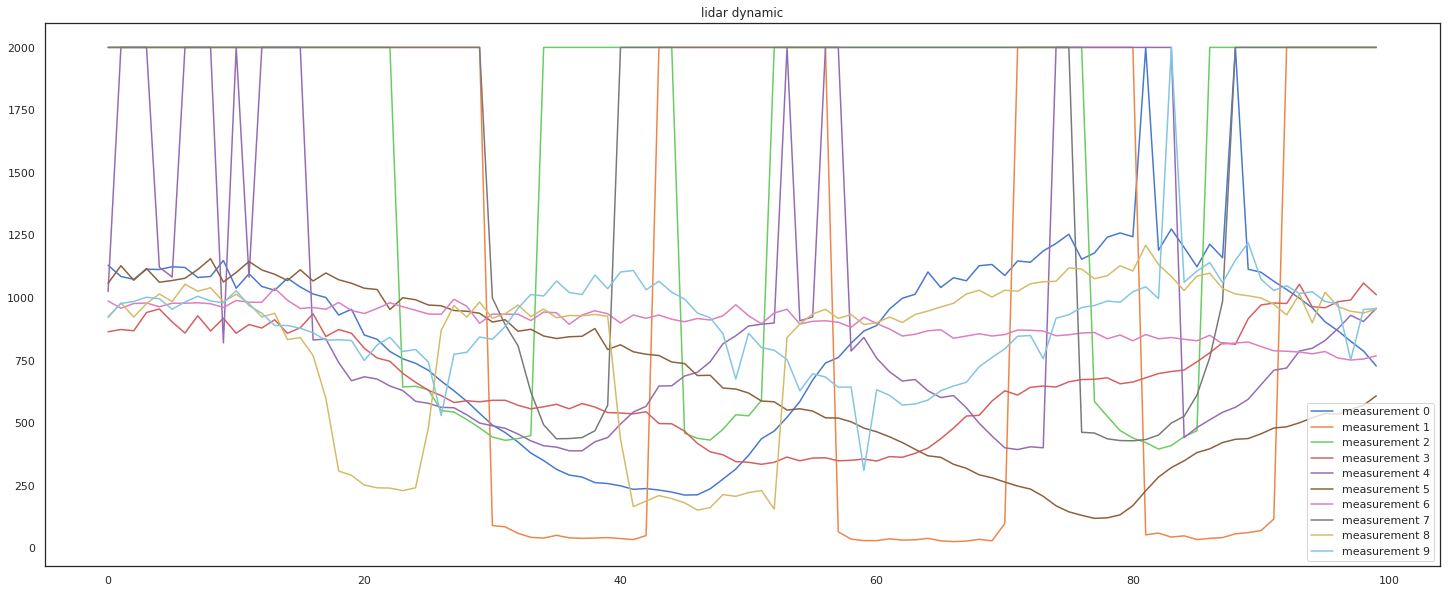

In [12]:
X_agent_dynamic = preprocess_data(lidar_dynamic)
plot_lidar(X_agent_dynamic, title='lidar dynamic')

In [24]:
from sklearn.preprocessing import normalize, StandardScaler

In [35]:
X_static_norm        = normalize(X_static, axis=1)
X_agent_static_norm  = normalize(X_agent_static, axis=1)
X_agent_dynamic_norm = normalize(X_agent_dynamic, axis=1)

In [36]:
X_static_new        = np.abs(X_static_norm[:, :-1]        - X_static_norm[:, 1:])
X_agent_static_new  = np.abs(X_agent_static_norm[:, :-1]  - X_agent_static_norm[:, 1:])
X_agent_dynamic_new = np.abs(X_agent_dynamic_norm[:, :-1] - X_agent_dynamic_norm[:, 1:])

In [37]:
X_static_new        = np.max(X_static_new, axis=1), np.std(X_static_new, axis=1)
X_agent_static_new  = np.max(X_agent_static_new, axis=1), np.std(X_agent_static_new, axis=1)
X_agent_dynamic_new = np.max(X_agent_dynamic_new, axis=1), np.std(X_agent_dynamic_new, axis=1)

In [38]:
X_static_new = np.array(X_static_new).T
X_agent_static_new = np.array(X_agent_static_new).T
X_agent_dynamic_new = np.array(X_agent_dynamic_new).T

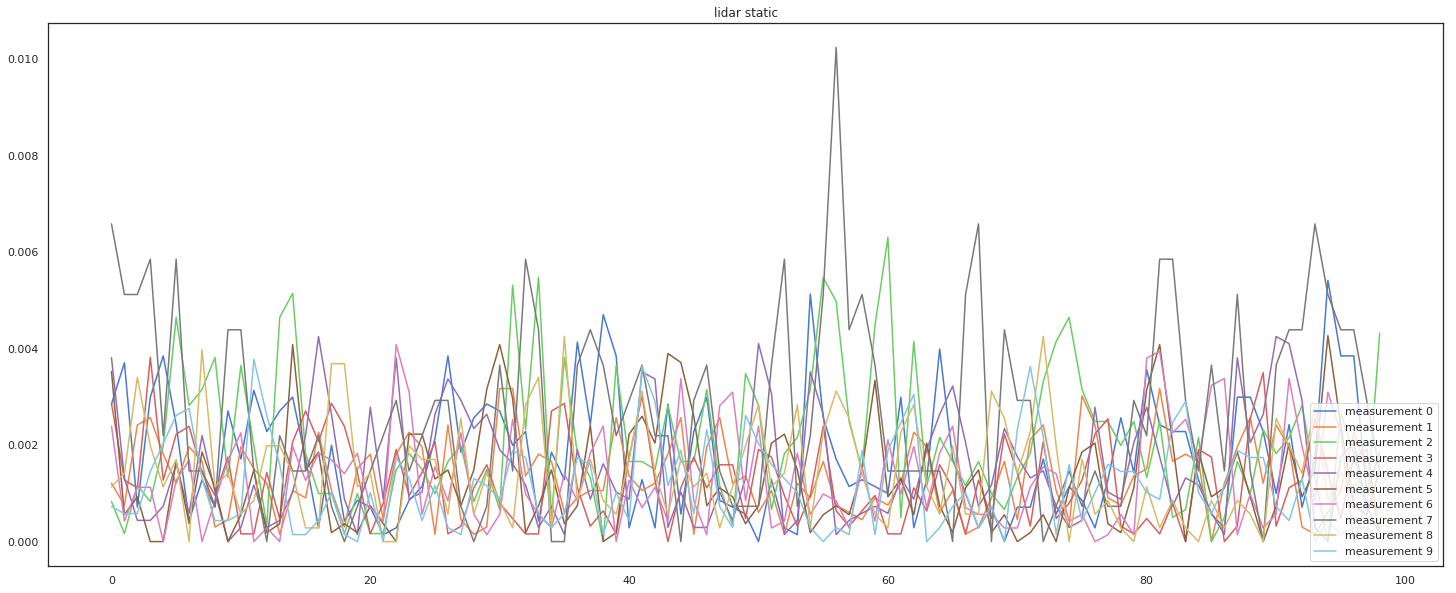

In [27]:
plot_lidar(X_static_new, title='lidar static')

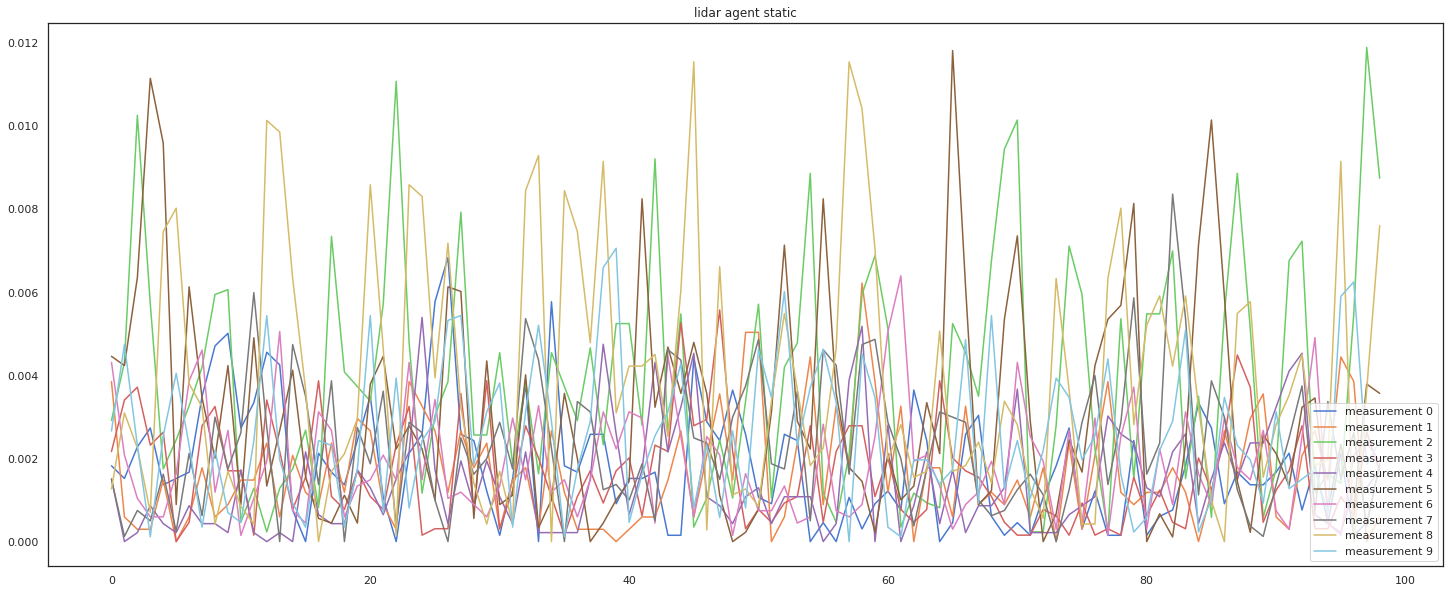

In [28]:
plot_lidar(X_agent_static_new, title='lidar agent static')

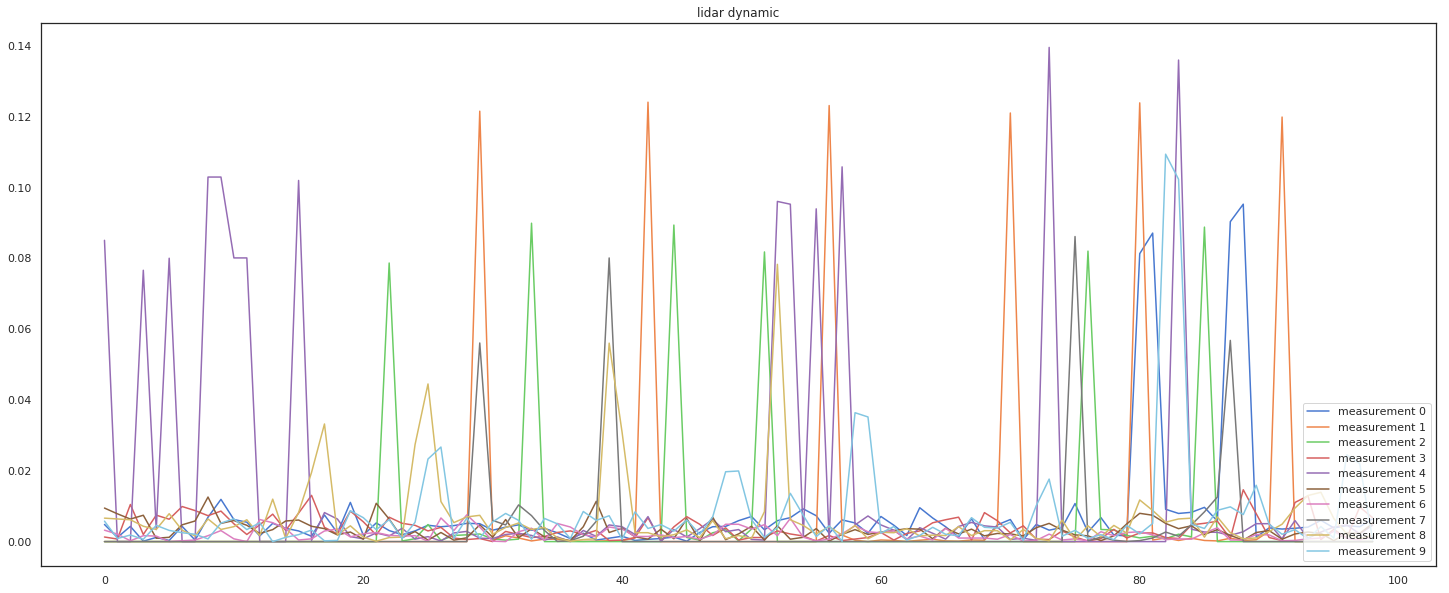

In [29]:
plot_lidar(X_agent_dynamic_new, title='lidar dynamic')

In [40]:
X_static_new.sum()

0.06120923

In [41]:
X_agent_static_new.sum()

0.09933722

In [42]:
X_agent_dynamic_new.sum()

0.90525705

In [43]:
lidar_data = np.vstack((X_static_new, X_agent_static_new, X_agent_dynamic_new))
n_comp = 2

In [44]:
lidar_data.shape

(30, 2)

In [45]:
lidar_data

array([[0.00541083, 0.00125223],
       [0.0031685 , 0.00080708],
       [0.00629956, 0.00144163],
       [0.00381549, 0.00089479],
       [0.00424533, 0.00116093],
       [0.0042638 , 0.00110084],
       [0.00407921, 0.00102983],
       [0.01023127, 0.00199925],
       [0.00425157, 0.00105886],
       [0.00377272, 0.00092549],
       [0.0068299 , 0.00143095],
       [0.00621521, 0.00132681],
       [0.01188198, 0.00276268],
       [0.00556949, 0.00123571],
       [0.00539155, 0.001278  ],
       [0.01180581, 0.00262355],
       [0.00638855, 0.00132879],
       [0.00835417, 0.00160321],
       [0.01153281, 0.00300571],
       [0.00705253, 0.0017198 ],
       [0.09516443, 0.01682227],
       [0.12392806, 0.02908326],
       [0.08979398, 0.02022725],
       [0.01461896, 0.00329419],
       [0.13937682, 0.03422953],
       [0.01256332, 0.00253969],
       [0.00754841, 0.00167457],
       [0.08603358, 0.01401351],
       [0.07819903, 0.01120818],
       [0.10926153, 0.0156765 ]], dtype=flo

In [47]:
km = KMeans(n_clusters=n_comp, max_iter=10000)
km.fit(lidar_data)
km.predict(lidar_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

In [48]:
gm = GaussianMixture(n_components=n_comp, max_iter=10000)
gm.fit(lidar_data)
print(gm.score(lidar_data))
print(gm.bic(lidar_data))
print(gm.predict(lidar_data))
print(gm.converged_)

8.902140994108033
-496.71528844819824
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1]
True


In [49]:
bgm = BayesianGaussianMixture(n_components=n_comp, max_iter=10000)
bgm.fit(lidar_data)
print(bgm.predict(lidar_data))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1]


In [50]:
lidar_data

array([[0.00541083, 0.00125223],
       [0.0031685 , 0.00080708],
       [0.00629956, 0.00144163],
       [0.00381549, 0.00089479],
       [0.00424533, 0.00116093],
       [0.0042638 , 0.00110084],
       [0.00407921, 0.00102983],
       [0.01023127, 0.00199925],
       [0.00425157, 0.00105886],
       [0.00377272, 0.00092549],
       [0.0068299 , 0.00143095],
       [0.00621521, 0.00132681],
       [0.01188198, 0.00276268],
       [0.00556949, 0.00123571],
       [0.00539155, 0.001278  ],
       [0.01180581, 0.00262355],
       [0.00638855, 0.00132879],
       [0.00835417, 0.00160321],
       [0.01153281, 0.00300571],
       [0.00705253, 0.0017198 ],
       [0.09516443, 0.01682227],
       [0.12392806, 0.02908326],
       [0.08979398, 0.02022725],
       [0.01461896, 0.00329419],
       [0.13937682, 0.03422953],
       [0.01256332, 0.00253969],
       [0.00754841, 0.00167457],
       [0.08603358, 0.01401351],
       [0.07819903, 0.01120818],
       [0.10926153, 0.0156765 ]], dtype=flo

In [273]:
lidar_data.shape

(30, 2)

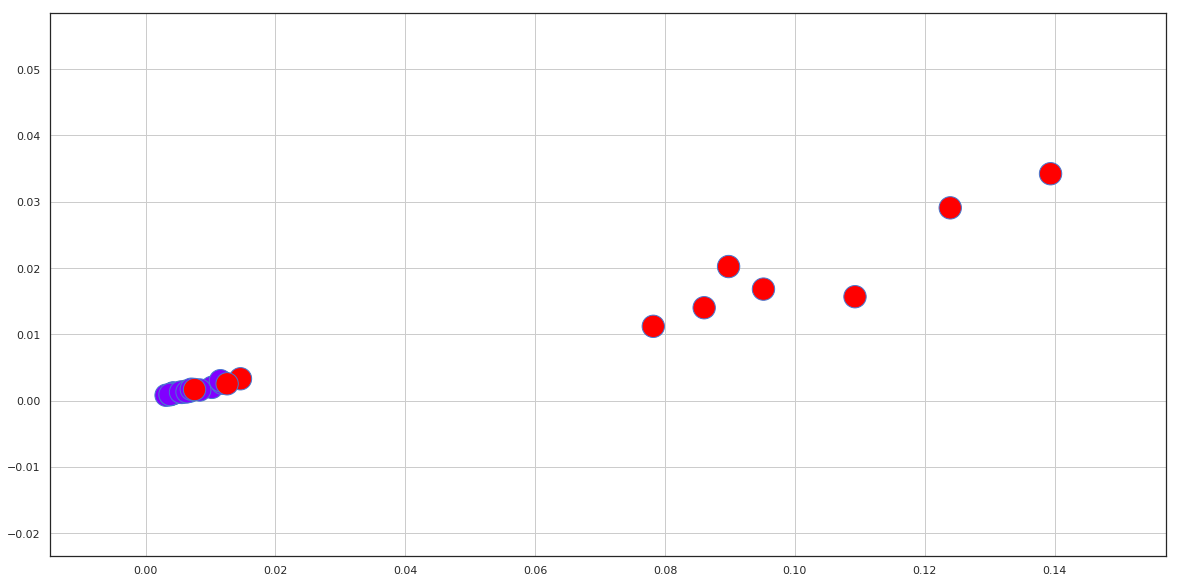

In [53]:
plt.figure(figsize=(20, 10))
plt.scatter(lidar_data[:,0], lidar_data[:,1], c=[0 for i in range(20)] + [1 for i in range(10)], s=500, cmap=cm.rainbow,
           edgecolors='b')
plt.grid()

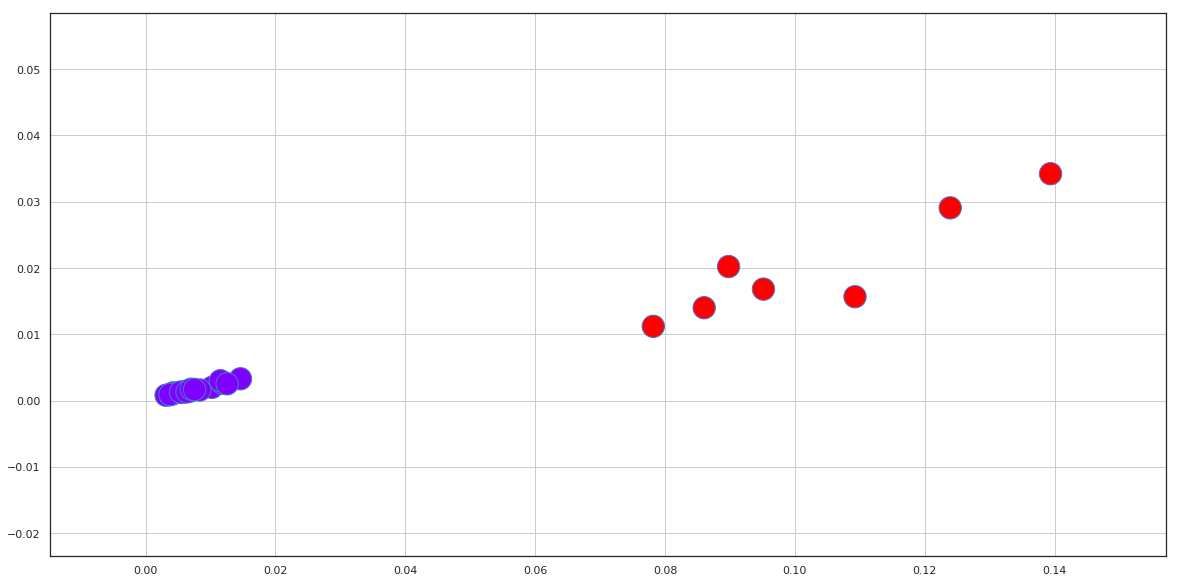

In [54]:
#tsne = TSNE()
#lidar_2dim = tsne.fit_transform(lidar_data)
plt.figure(figsize=(20, 10))
plt.scatter(lidar_data[:,0], lidar_data[:,1], c=bgm.predict(lidar_data), s=500, cmap=cm.rainbow, edgecolors='b')
plt.grid()

In [56]:
bgm.covariances_

array([[[1.02381937e-04, 2.04358965e-05],
        [2.04358965e-05, 5.25036353e-06]],

       [[1.06016044e-03, 2.56981349e-04],
        [2.56981349e-04, 7.67885143e-05]]])

In [57]:
gm.covariances_

array([[[1.15790349e-05, 2.24412902e-06],
        [2.24412902e-06, 1.49944344e-06]],

       [[4.20874893e-04, 1.46003608e-04],
        [1.46003608e-04, 6.19620915e-05]]])

## Find a better and more informative embedding